# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [29]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [4]:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [5]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
sensor.shape

(1751, 12)

In [7]:
sensor.isnull().sum().sort_values(ascending=False)

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

In [8]:
sensor.dropna(inplace = True)

How many rows and columns are in our data?

**R:** there was no missing data

In [9]:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [10]:
sensor["time"] = pd.date_range("1/1/2018 00:00:00", "1/1/2018 00:29:10", periods = 1751)
freq = pd.infer_freq(sensor["time"])

In [11]:
print(freq)

S


In [12]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,time
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


**R:** the frequency is set in seconds, so the dataframe was ok

Assign the time series index to the dataframe's index.

In [13]:
sensor.index = pd.to_datetime(sensor["time"])

In [14]:
sensor.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', name='time', length=1751, freq=None)

In [15]:
sensor.index.freq = pd.infer_freq(sensor.index)

In [16]:
sensor.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', name='time', length=1751, freq='S')

**R:** I don't know why I needed to change the frequency again when adding the column as index, as I did it before, but it's done...

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [17]:
import statsmodels.api as sm
sensor.rename(columns = {'userAcceleration.x':'userAcceleration_x'}, inplace = True)
res = sm.tsa.seasonal_decompose(sensor.userAcceleration_x, period=60, model='additive')

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

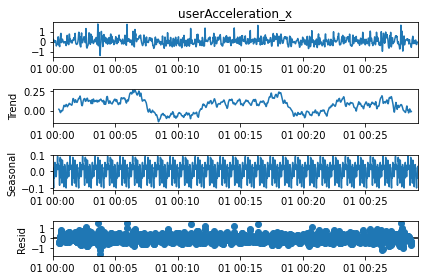

In [18]:
res.plot();

**R:** I don't understand why my residual data looks bigger than the example...

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

Text(0, 0.5, 'y(t+1)')

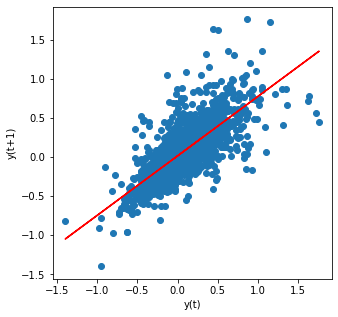

In [21]:
lr = LinearRegression()
data_t = sensor["userAcceleration_x"][:-1]
data_t_plus_1 = sensor["userAcceleration_x"][1:]
lr.fit(data_t.to_frame(),data_t_plus_1)
y_pred = lr.predict(data_t.to_frame())

plt.figure(figsize=(5,5))
plt.scatter(x=data_t,y=data_t_plus_1)
plt.plot(data_t,y_pred, c="r")
plt.xlabel("y(t)")
plt.ylabel("y(t+1)")

Create a lag plot for `rotationRate.x`

Text(0, 0.5, 'y_2(t+1)')

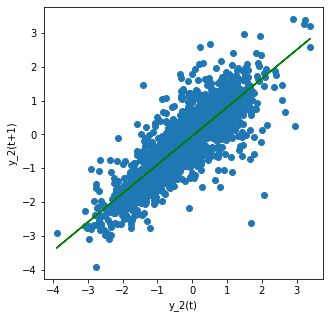

In [23]:
sensor.rename(columns = {'rotationRate.x':'rotationRate_x'}, inplace = True)

lr_2 = LinearRegression()
data_t_2 = sensor["rotationRate_x"][:-1]
data_t_plus_1_2 = sensor["rotationRate_x"][1:]
lr_2.fit(data_t_2.to_frame(),data_t_plus_1_2)
y_pred_2 = lr_2.predict(data_t_2.to_frame())

plt.figure(figsize=(5,5))
plt.scatter(x=data_t_2,y=data_t_plus_1_2)
plt.plot(data_t_2,y_pred_2, c="g")
plt.xlabel("y_2(t)")
plt.ylabel("y_2(t+1)")

What are your conclusions from both visualizations?

**R:** From my point of view the rotationRate_x fits better the line, and there are less points spreaded, so as far as I understand, the data is more continuous and better to fit it in a model...  
Spreaded data is impredictible, so the closer the data is to the diagonal, the better.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [25]:
res1 = adfuller(sensor["userAcceleration_x"])
res1

(-17.95799408616975,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [26]:
res2 = adfuller(sensor["rotationRate_x"])
res2

(-5.269860625086413,
 6.320230335912449e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

**R:** In both cases, the result of adf is smaller than the critical values, so both cases can be considered stationarly.  
However, both, the adf and the p-value for the userAcceleration_x are smaller, so the hypothesis is stronger.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

**R:** The stationarity was previously calculated, and as the set was already stationary, d = 0.

In [27]:
y_test = sensor["userAcceleration_x"][-10:]
y_train = sensor["userAcceleration_x"][:-10]

**R:** I know it's not required to do it, as it's already said in the lab statements, but I want to check the "q" and "p" by myself.  
  
  First, the MA will decide the value of q:

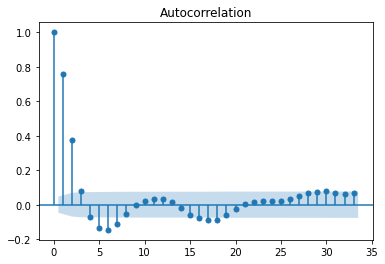

In [30]:
data = sensor["userAcceleration_x"]
plot_acf(data);

**R:** There are only 2 points out of the dark area, so q = 2, OK. Now with q.

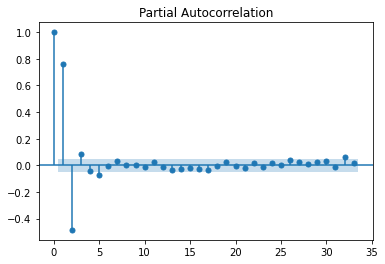

In [31]:
plot_pacf(data);

**R** I don't understand why is not q = 3 instead of 1...

In [60]:
order = (2,0,1)
arima = ARIMA(y_train,order=order, freq="S")
arima;

In [61]:
arima = arima.fit()

In [62]:
y_pred = arima.predict(len(y_train),len(y_train)+9)

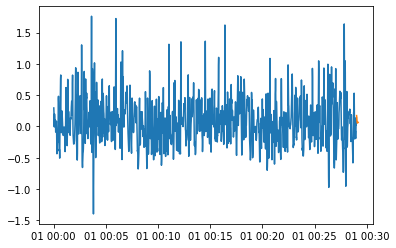

In [63]:
plt.plot(y_train)
plt.plot(y_pred)

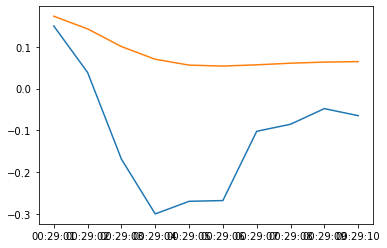

In [64]:
plt.plot(y_test)
plt.plot(y_pred)

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [65]:
mean_squared_error(y_pred, y_test)

0.05075630705684099

**R** Is not that bad, the error is small.